# Plot Figures of the Thesis (synthetic data)

This Notebook provides all the code for plotting the figures of the M.Sc. Thesis (Synthetic Data Analysis) that were not already created during the analysis.

In [2]:
# imports
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import os
import seaborn as sns
import re
import math
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Rectangle
import matplotlib.gridspec as gridspec

from plot_functions import *

In [3]:
# folder directories
ts_data_dir = "C:/Users/Maria/Documents/Masterstudium/Masterarbeit/MScThesis/explore/data/final_datasets/"

output_dir_glv = "C:/Users/Maria/Documents/Masterstudium/Masterarbeit/glv_output/"
output_dir_deepmod = "C:/Users/Maria/Documents/Masterstudium/Masterarbeit/deepmod_output/output_LRZ_Cluster_10-27_structured/"
output_dir_node = "C:/Users/Maria/Documents/Masterstudium/Masterarbeit/NODE_output/"

plot_dir = "C:/Users/Maria/Documents/Masterstudium/Masterarbeit/Plots/"


# load standard matplotlib colors
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Plots

## Overview over the three synthetic dataset

In [5]:
# path of data file
filenames = ["miaSim_GLV_4species_new.csv",
             "ts_3DLV.csv",
             "ts_VanderPol.csv"]

# function to import the datafile and put it into the right format
def create_data(filename):
    data = np.genfromtxt(f'{ts_data_dir}{filename}', delimiter=",")
    usol = data[1:, :]  # removes header
    ts = usol[:, 0]
    data_y = usol[:, 1:]
    # set dimensions of the dataset
    global n_samples, n_taxa
    n_samples, n_taxa = data_y.shape
    return [ts], [data_y]

# load datasets
T = []
Y = []
i = 0
for filename in filenames:
    T_tmp, Y_tmp = create_data(filename)
    T.extend(T_tmp)
    Y.extend(Y_tmp)

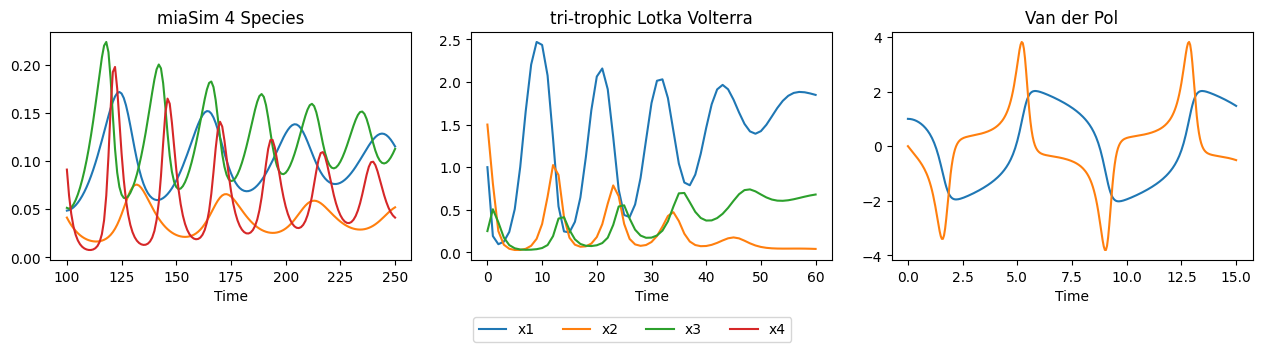

In [6]:
# make plot
fig, axs = plt.subplots(1, 3)

fig.set_figwidth(13)
fig.set_figheight(3.5)

# miaSim
for i in np.arange(4):
    axs[0].plot(T[0], Y[0][:,i], label = f"x{i+1}")
axs[0].set_title("miaSim 4 Species")
axs[0].set_xlabel("Time")

# 3DLV
for i in np.arange(3):
    axs[1].plot(T[1], Y[1][:,i], label = f"x{i+1}")
axs[1].set_title("tri-trophic Lotka Volterra")
axs[1].set_xlabel("Time")

# van der Pol
for i in np.arange(2):
    axs[2].plot(T[2], Y[2][:,i], label = f"x{i+1}")
axs[2].set_title("Van der Pol")
axs[2].set_xlabel("Time")

# add one legend for all polts (in the lower center)
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05),
              fancybox=True, shadow=False, ncol = 4)
fig.tight_layout(pad=2.0)

plt.savefig(f'{plot_dir}synthetic_datasets_overview.pdf', dpi=300, bbox_inches='tight')

## Plot fits DeepMoD miaSimS4 (four example runs)

### four example runs

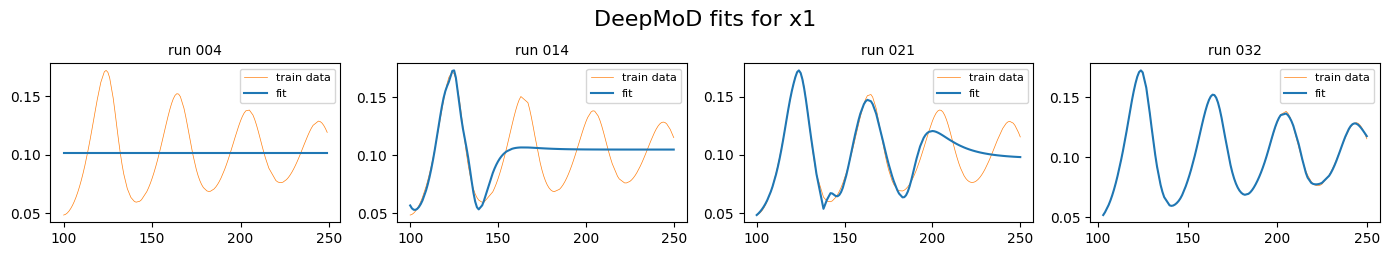

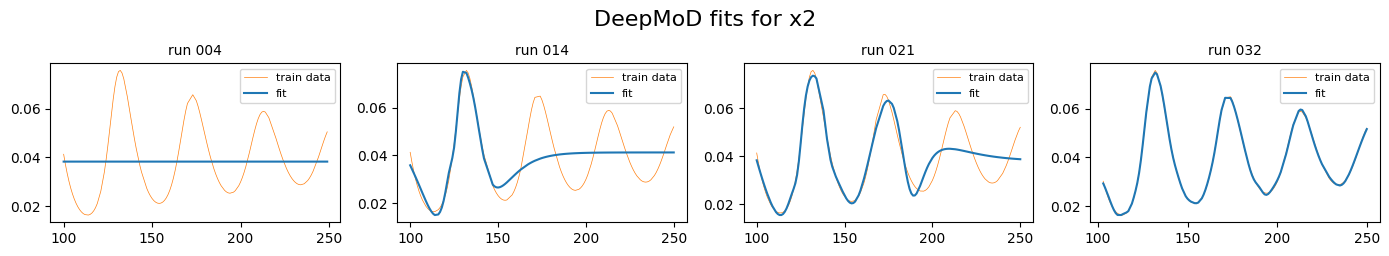

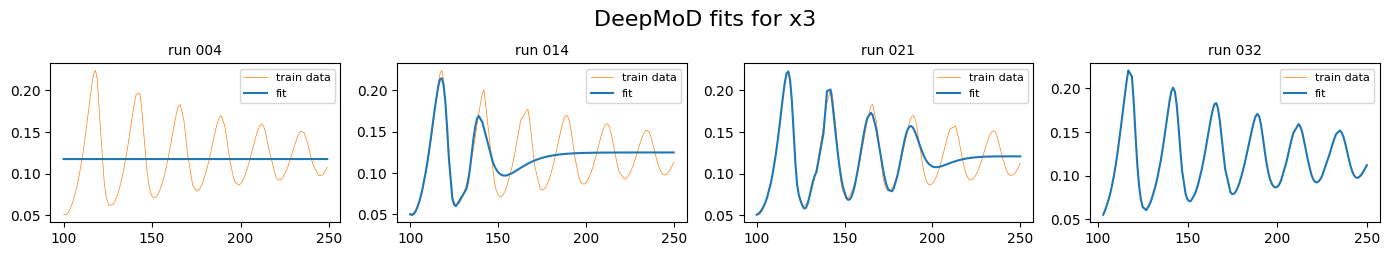

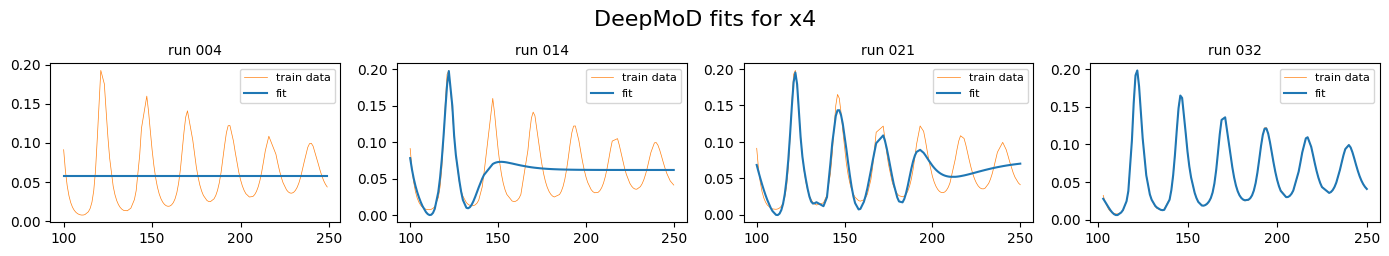

In [7]:
n_taxa = 4
out_dir = output_dir_deepmod + "miaSimS4/_int_2/"
for taxon in np.arange(1, n_taxa + 1):
    # taxon = 3

    # example runs
    runs = [
        "bad_fits/output_batch_10-23_miaSimS4_new_run004_5_100_th0-1_int2",
        "bad_fits/output_batch_10-23_miaSimS4_new_run014_5_100_th0-1_int2",
        "output_batch_10-23_miaSimS4_new_run021_5_100_th0-1_int2",
        "output_batch_10-23_miaSimS4_new_run032_5_50_th0-1_int2"
    ]
    n_runs = len(runs)

    if(n_runs > 0):
        # set plot dimensions
        n_col = n_runs
        n_row = 1

        # make plot
        fig, axs = plt.subplots(n_row, n_col)
        fig.set_figwidth(3.5*n_col)
        fig.set_figheight(2.5*n_row)
        fig.suptitle(f"DeepMoD fits for x{taxon}",
                    size=16, y=1.0)
        fig.tight_layout(pad=1.0)  

        for idx, run in enumerate(runs):
            plot_path_tmp = f"{out_dir}{run}/Data/"
            if os.path.exists(f"{plot_path_tmp}/prediction_x{taxon}.csv"):
                # read data files
                df_pred = pd.read_csv(f"{plot_path_tmp}prediction_x{taxon}.csv", header=[0])
                df_data_train = pd.read_csv(f"{plot_path_tmp}data_train_x{taxon}.csv", header=[0])
                # convert files to numpy array
                data_train = np.array(df_data_train)
                pred = np.array(df_pred)
                # make plot
                axs[idx].plot(data_train[:,1], data_train[:,0], label = "train data",  linewidth=0.5, color = colors[1])
                axs[idx].plot(pred[:,1], pred[:,0], label = "fit")
                # axs[int(y/n_col), (y % n_col)].scatter(data_train[:,1], data_train[:,0], label = "data", s = 1, color = colors[1])
                axs[idx].legend(fontsize="8")
                run_nr = re.search(r"_run(\d{2,3})", run)
                axs[idx].set_title(f"run {run_nr.group(1)}", size = 10)


        # save plots
        plt.savefig(f'{plot_dir}/DeepMoD_miaSim_example_approximations_int2_x{taxon}.pdf',
                    bbox_inches='tight', dpi = 300)

### example run lib2

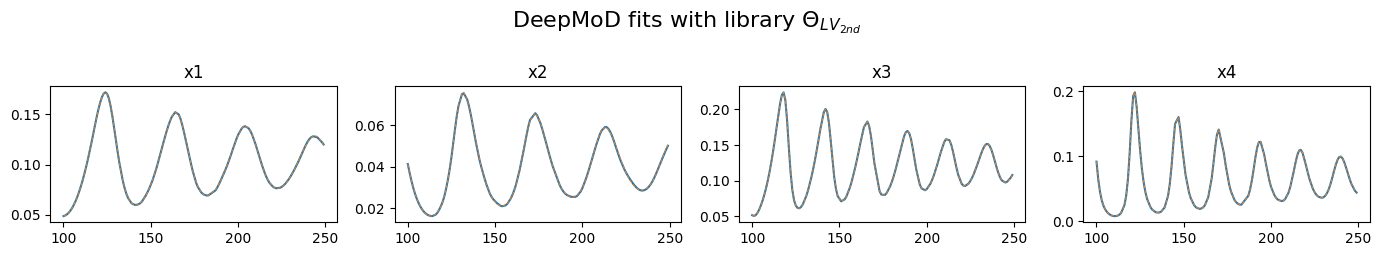

In [21]:
n_taxa = 4
out_dir = output_dir_deepmod + "miaSimS4/_int_2/"

# example runs
run = "output_batch_10-23_miaSimS4_new_run001_10_50_th0-1_int2"
# set plot dimensions
n_col = n_taxa
n_row = 1

# make plot
fig, axs = plt.subplots(n_row, n_col)
fig.set_figwidth(3.5*n_col)
fig.set_figheight(2.5*n_row)
fig.suptitle(r"DeepMoD fits with library $\Theta_{LV_{2nd}}$",
            size=16, y=1.0)

for taxon in np.arange(1, n_taxa + 1):
    plot_path_tmp = f"{out_dir}{run}/Data/"
    if os.path.exists(f"{plot_path_tmp}/prediction_x{taxon}.csv"):
        # read data files
        df_pred = pd.read_csv(f"{plot_path_tmp}prediction_x{taxon}.csv", header=[0])
        df_data_train = pd.read_csv(f"{plot_path_tmp}data_train_x{taxon}.csv", header=[0])
        # convert files to numpy array
        data_train = np.array(df_data_train)
        pred = np.array(df_pred)
        # make plot
        axs[taxon-1].plot(pred[:,1], pred[:,0], label = "fit")
        axs[taxon-1].plot(data_train[:,1], data_train[:,0], label = "train data",  linewidth=0.7, color = colors[1], linestyle = '--')
        axs[taxon-1].set_title(f"x{taxon}", size = 12)

# # add one legend for all polts (in the lower center)
# handles, labels = axs[0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1),
#               fancybox=True, shadow=False, ncol = 4)
fig.tight_layout(pad=1.0)

# save plots
plt.savefig(f'{plot_dir}/DeepMoD_miaSim_approximations_int2.pdf',
            bbox_inches='tight', dpi = 300)

### example run lib1

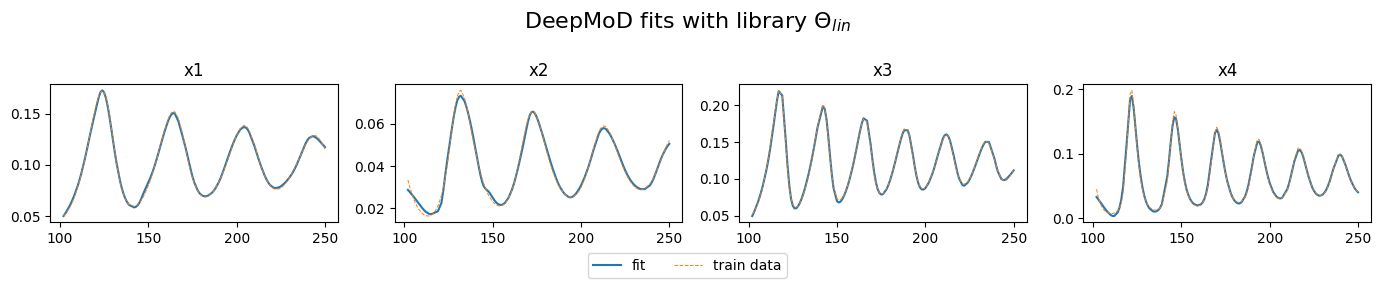

In [22]:
n_taxa = 4
out_dir = output_dir_deepmod + "miaSimS4/_int_1/"

# example runs
run = "output_batch_10-23_miaSimS4_new_run020_10_50_th0-1_int1"
# set plot dimensions
n_col = n_taxa
n_row = 1

# make plot
fig, axs = plt.subplots(n_row, n_col)
fig.set_figwidth(3.5*n_col)
fig.set_figheight(2.5*n_row)
fig.suptitle(r"DeepMoD fits with library $\Theta_{lin}$",
            size=16, y=1.0)

for taxon in np.arange(1, n_taxa + 1):
    plot_path_tmp = f"{out_dir}{run}/Data/"
    if os.path.exists(f"{plot_path_tmp}/prediction_x{taxon}.csv"):
        # read data files
        df_pred = pd.read_csv(f"{plot_path_tmp}prediction_x{taxon}.csv", header=[0])
        df_data_train = pd.read_csv(f"{plot_path_tmp}data_train_x{taxon}.csv", header=[0])
        # convert files to numpy array
        data_train = np.array(df_data_train)
        pred = np.array(df_pred)
        # make plot
        axs[taxon-1].plot(pred[:,1], pred[:,0], label = "fit")
        axs[taxon-1].plot(data_train[:,1], data_train[:,0], label = "train data",  linewidth=0.7, color = colors[1], linestyle = '--')
        axs[taxon-1].set_title(f"x{taxon}", size = 12)

# add one legend for all polts (in the lower center)
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1),
              fancybox=True, shadow=False, ncol = 4)
fig.tight_layout(pad=1.0)

# save plots
plt.savefig(f'{plot_dir}/DeepMoD_miaSim_approximations_int1.pdf',
            bbox_inches='tight', dpi = 300)

## Boxplot DeepMoD miaSimS4

In [8]:
# Function to create a boxplot for a given axis
def create_boxplot(ax, data, x_labels, title, ylim = None):
    boxplot = ax.boxplot(data)
    ax.set_title(title, fontsize = 14, pad = 10)
    ax.set_xticklabels(x_labels, rotation=60, ha="right", fontsize = 11)
    # for median in boxplot['medians']:
    #     median.set_color('k')
    ax.axhline(y=0, color='#A9A9A9', linestyle='--', zorder=-3) # add horizontal line in 0
    if ylim:
        ax.set_ylim(ylim)

def generate_boxplot_data(folder):
    runs = [
        s for s in os.listdir(folder)
        if os.path.isdir(os.path.join(folder, s)) and
           "." not in s and
           os.path.isfile(os.path.join(folder, s, "Data", "model_estimated_coeffs.csv"))
    ]

    if not runs:
        print(f"No runs found in {folder}.")
        return None
    
    list_coeffs_all = [pd.read_csv(f"{folder}/{run}/Data/model_estimated_coeffs.csv", header=[0], index_col=[0]).to_numpy() for run in runs]
    df_library_tmp = pd.read_csv(f"{folder}/{runs[-1]}/Data/model_library_values.csv", header=[0], index_col=[0])

    coeffs = [[[] for _ in range(list_coeffs_all[0].shape[0])] for _ in range(list_coeffs_all[0].shape[1])]  # n_taxa empty lists of n_lib_values empyt lists
    library_coeffs = [df_library_tmp[f"x{i}"] for i in range(1, n_taxa+1)]

    for arr in list_coeffs_all:
        for taxon in range(arr.shape[1]):
            for lib_val in range(arr.shape[0]):
                coeffs[taxon][lib_val].append(arr[lib_val, taxon])

    n_runs = len(runs)

    return coeffs, library_coeffs, n_runs

### library int1

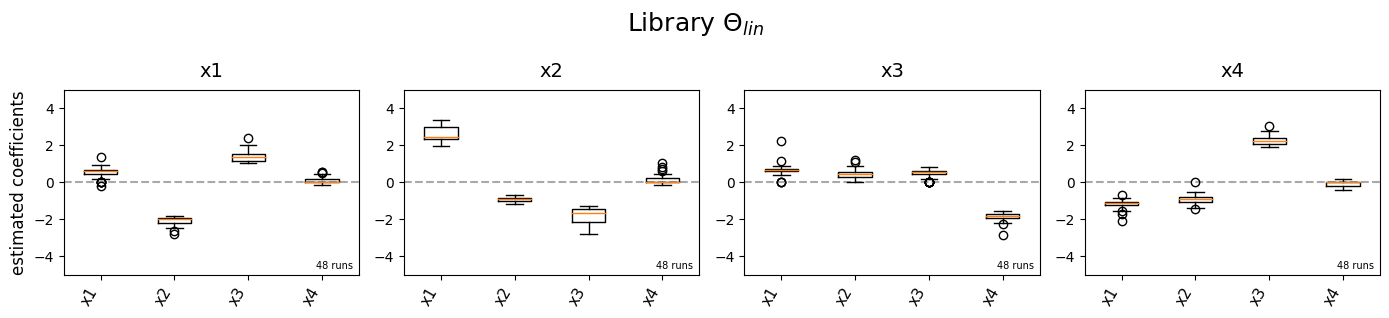

In [9]:
out_dir = output_dir_deepmod + "miaSimS4/_int_1"
n_taxa = 4

result = generate_boxplot_data(out_dir)
if result:
    coeffs, library_coeffs, n = result
    fig, axs = plt.subplots(nrows=1, ncols=n_taxa, figsize=(3.5*n_taxa, 3.2))
    fig.suptitle(r'Library $\Theta_{lin}$', fontsize = 18)
    
    ylimits = [-5,5]

    for i in range(n_taxa):
        create_boxplot(axs[i], coeffs[i], library_coeffs[i], f"x{i+1}", ylimits)
        axs[i].text(0.98, 0.02, f'{n} runs', ha='right', va='bottom', fontsize=7, transform=axs[i].transAxes)
    
    axs[0].set_ylabel("estimated coefficients", fontsize = 12)

    plt.tight_layout()

    # # save plots in one file
    # plt.savefig(f'{plot_dir}/DeepMoD_miaSim_boxplot_int1.pdf',
    #             bbox_inches='tight', dpi = 300)

### library int2

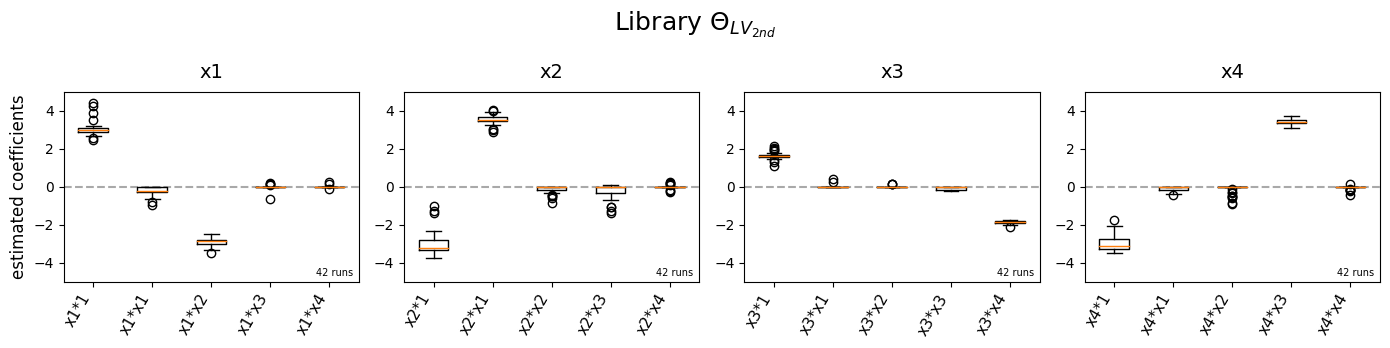

In [10]:
out_dir = output_dir_deepmod + "miaSimS4/_int_2"
n_taxa = 4

result = generate_boxplot_data(out_dir)
if result:
    coeffs, library_coeffs, n = result
    fig, axs = plt.subplots(nrows=1, ncols=n_taxa, figsize=(3.5*n_taxa, 3.5))
    # fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))
    fig.suptitle(r'Library $\Theta_{LV_{2nd}}$', fontsize = 18)
    
    ylimits = [-5,5]

    for i in range(n_taxa):
        create_boxplot(axs[i], coeffs[i], library_coeffs[i], f"x{i+1}", ylim=ylimits)
        axs[i].text(0.98, 0.02, f'{n} runs', ha='right', va='bottom', fontsize=7, transform=axs[i].transAxes)
    
    axs[0].set_ylabel("estimated coefficients", fontsize = 12)

    plt.tight_layout()
    
    # # save plots in one file
    # plt.savefig(f'{plot_dir}/DeepMoD_miaSim_boxplot_int2.pdf',
    #             bbox_inches='tight', dpi = 300)

## Boxplots DeepMoD 3DLV (four libraries)

In [11]:
out_dir = output_dir_deepmod + "3DLV_0-60/"

# Function to create a boxplot for a given axis
def create_boxplot(ax, data, x_labels, title, true_coeffs = None, y_limits = None):
    boxplot = ax.boxplot(data)
    ax.set_title(title, fontsize = 12, pad = 16)
    ax.set_xticklabels(x_labels, rotation=60, ha="right")
    # for median in boxplot['medians']:
    #     median.set_color('k')
    if true_coeffs is not None:
        ax.plot(range(1, len(true_coeffs)+1), true_coeffs, 'ro', markersize=3) # add true coeffs as red dots
    ax.axhline(y=0, color='#A9A9A9', linestyle='--', zorder=-3) # add horizontal line in 0
    if y_limits is not None:
        ax.set_ylim(y_limits)

# Function to generate boxplots for a specific library
def generate_boxplots(lib):
    runs = [s for s in os.listdir(out_dir) if lib in s and "." not in s]

    if not runs:
        print(f"No runs found for {lib}.")
        return None

    list_coeffs_all = [pd.read_csv(f"{out_dir}{run}/Data/model_estimated_coeffs.csv", header=[0], index_col=[0]).to_numpy() for run in runs]
    df_library_tmp = pd.read_csv(f"{out_dir}{runs[-1]}/Data/model_library_values.csv", header=[0], index_col=[0])
    library_x1, library_x2, library_x3 = df_library_tmp["x1"], df_library_tmp["x2"], df_library_tmp["x3"]

    coeffs_x1 = [[] for _ in range(list_coeffs_all[0].shape[0])]
    coeffs_x2 = [[] for _ in range(list_coeffs_all[0].shape[0])]
    coeffs_x3 = [[] for _ in range(list_coeffs_all[0].shape[0])]
    for arr in list_coeffs_all:
        for i in range(arr.shape[0]):
            coeffs_x1[i].append(arr[i, 0])
            coeffs_x2[i].append(arr[i, 1])
            coeffs_x3[i].append(arr[i, 2])

    return coeffs_x1, coeffs_x2, coeffs_x3, library_x1, library_x2, library_x3

C:\Users\Maria\AppData\Local\Temp\ipykernel_25524\123997070.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


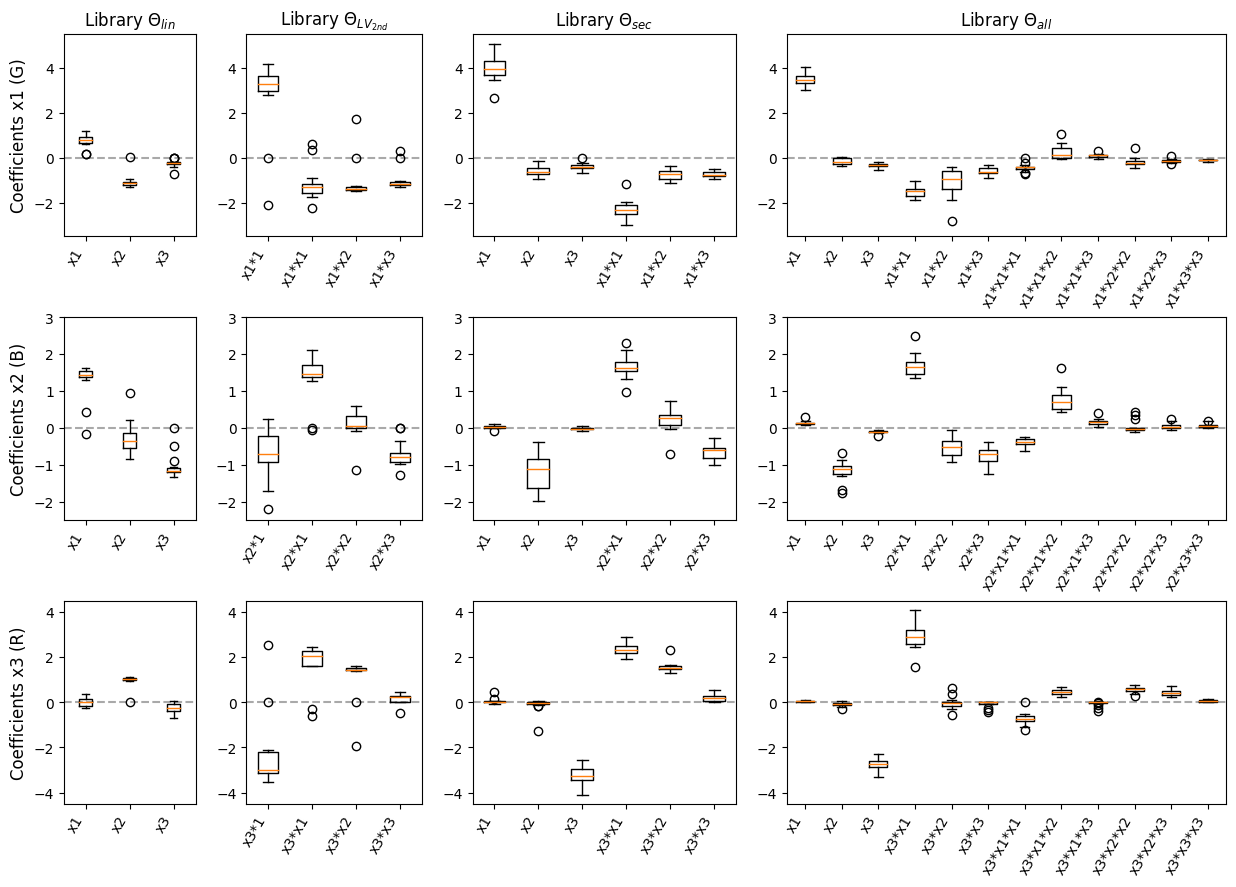

In [12]:
libraries = ["int1", "int2", "int5", "int4"]

# Adjusting the figure layout
width_ratios = [3, 4, 6, 10]
fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(3, len(libraries), width_ratios=width_ratios, wspace=0.2, hspace=0.4)
axs = np.array([[plt.subplot(gs[i, j]) for j in range(len(libraries))] for i in range(3)])

# true_coeffs_x1 = [1, -2.5, -1.5, -1/3, -2.5, -1.5]
# true_coeffs_x2 = [0, 1.5, 0, 2.5, 0, -1]
# true_coeffs_x3 = [0, 0, 0.5, 1.5, 1, 0]

y_limits_row_1 = [-3.5, 5.5]
y_limits_row_2 = [-2.5, 3]
y_limits_row_3 = [-4.5, 4.5]

for i, lib in enumerate(libraries):
    result = generate_boxplots(lib)
    if result:
        coeffs_x1, coeffs_x2, coeffs_x3, library_x1, library_x2, library_x3 = result
        create_boxplot(axs[0, i], coeffs_x1, library_x1, "", y_limits=y_limits_row_1) #, true_coeffs=true_coeffs_x1[0:len(coeffs_x1)])
        create_boxplot(axs[1, i], coeffs_x2, library_x2, "", y_limits=y_limits_row_2) #, true_coeffs=true_coeffs_x2[0:len(coeffs_x2)])
        create_boxplot(axs[2, i], coeffs_x3, library_x3, "", y_limits=y_limits_row_3) #, true_coeffs=true_coeffs_x3[0:len(coeffs_x3)])

# set row names
axs[0, 0].set_ylabel("Coefficients x1 (G)", fontsize = 12)
axs[1, 0].set_ylabel("Coefficients x2 (B)", fontsize = 12)
axs[2, 0].set_ylabel("Coefficients x3 (R)", fontsize = 12)
# set column titles
axs[0, 0].set_title(r'Library $\Theta_{lin}$', fontsize = 12)
axs[0, 1].set_title(r'Library $\Theta_{LV_{2nd}}$', fontsize = 12)
axs[0, 2].set_title(r'Library $\Theta_{sec}$', fontsize = 12)
axs[0, 3].set_title(r'Library $\Theta_{all}$', fontsize = 12)

plt.tight_layout()

# save plot
plt.savefig(f'{plot_dir}/3DLV_coeff_boxplots_orange_median.pdf', 
            bbox_inches='tight', dpi = 300)

## Plot fits DeepMoD 3DLV three libraries

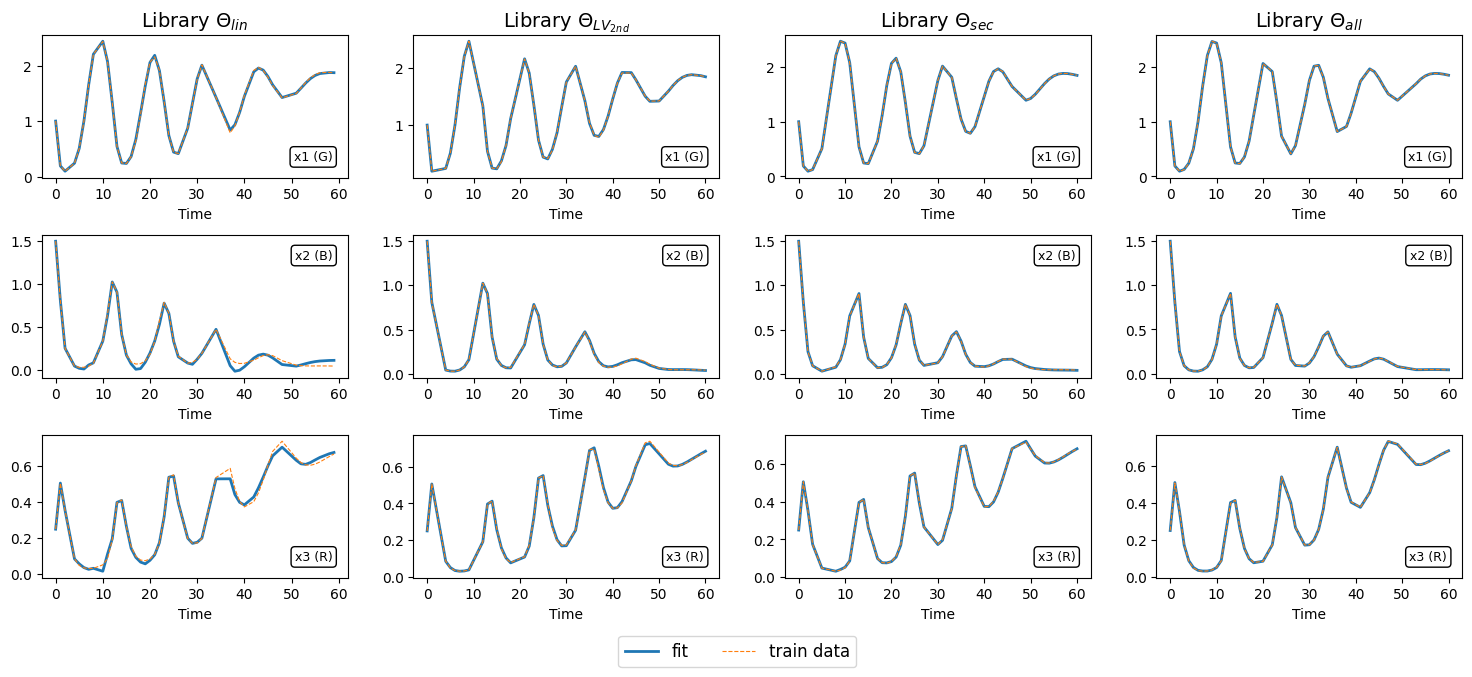

In [37]:
out_dir = output_dir_deepmod + "3DLV_0-60/"
n_taxa = 3

# three example runs
filenames = [
    "output_batch_10-17_3DLV_run02_5_100_th0-001_int1",
    "output_batch_10-17_3DLV_run05_5_100_th0-001_int2",
    "output_batch_10-20_3DLV_run05_5_100_th0-001_int5",
    "output_batch_10-17_3DLV_run05_5_100_th0-001_int4"
    ]

fig, axs = plt.subplots(3, 4)

fig.set_figwidth(15)
fig.set_figheight(6)
fig.tight_layout(pad=1.0, h_pad=2)

# function to import the datafile and put it into the right format
for run_idx, run in enumerate(filenames):
    plot_path_tmp = f"{out_dir}{run}/Data/"
    if os.path.exists(f"{plot_path_tmp}/prediction_x1.csv"):
        for taxon in np.arange(1, n_taxa+1):
            # read data files
            df_pred = pd.read_csv(f"{plot_path_tmp}prediction_x{taxon}.csv", header=[0])
            df_data_train = pd.read_csv(f"{plot_path_tmp}data_train_x{taxon}.csv", header=[0])
            # convert files to numpy array
            data_train = np.array(df_data_train)
            pred = np.array(df_pred)
            # make plot
            axs[taxon-1, run_idx].plot(pred[:,1], pred[:,0], label = "fit", linewidth=2)
            axs[taxon-1, run_idx].plot(data_train[:,1], data_train[:,0], label = "train data", linewidth=0.8, linestyle = '--', color = colors[1])
            axs[taxon-1, run_idx].set_xlabel("Time")
            
    axs[0, run_idx].text(0.95, 0.1, "x1 (G)", ha='right', va='bottom', transform=axs[0, run_idx].transAxes, bbox=dict(boxstyle="round", ec="black", fc="white"), fontsize = 9)
    axs[1, run_idx].text(0.95, 0.9, "x2 (B)", ha='right', va='top', transform=axs[1, run_idx].transAxes, bbox=dict(boxstyle="round", ec="black", fc="white"), fontsize = 9)
    axs[2, run_idx].text(0.95, 0.1, "x3 (R)", ha='right', va='bottom', transform=axs[2, run_idx].transAxes, bbox=dict(boxstyle="round", ec="black", fc="white"), fontsize = 9)

# set column titles
axs[0, 0].set_title(r'Library $\Theta_{lin}$', fontsize = 14)
axs[0, 1].set_title(r'Library $\Theta_{LV_{2nd}}$', fontsize = 14)
axs[0, 2].set_title(r'Library $\Theta_{sec}$', fontsize = 14)
axs[0, 3].set_title(r'Library $\Theta_{all}$', fontsize = 14)

# add one legend for all polts (in the lower center)
handles, labels = axs[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1),
              fancybox=True, shadow=False, ncol = 4, fontsize = 12)

# save plots in one file
plt.savefig(f'{plot_dir}3DLV_comparing_libraries_fits.pdf',
            bbox_inches='tight', dpi = 300)

## Plot fits DeepMoD VdP three libraries

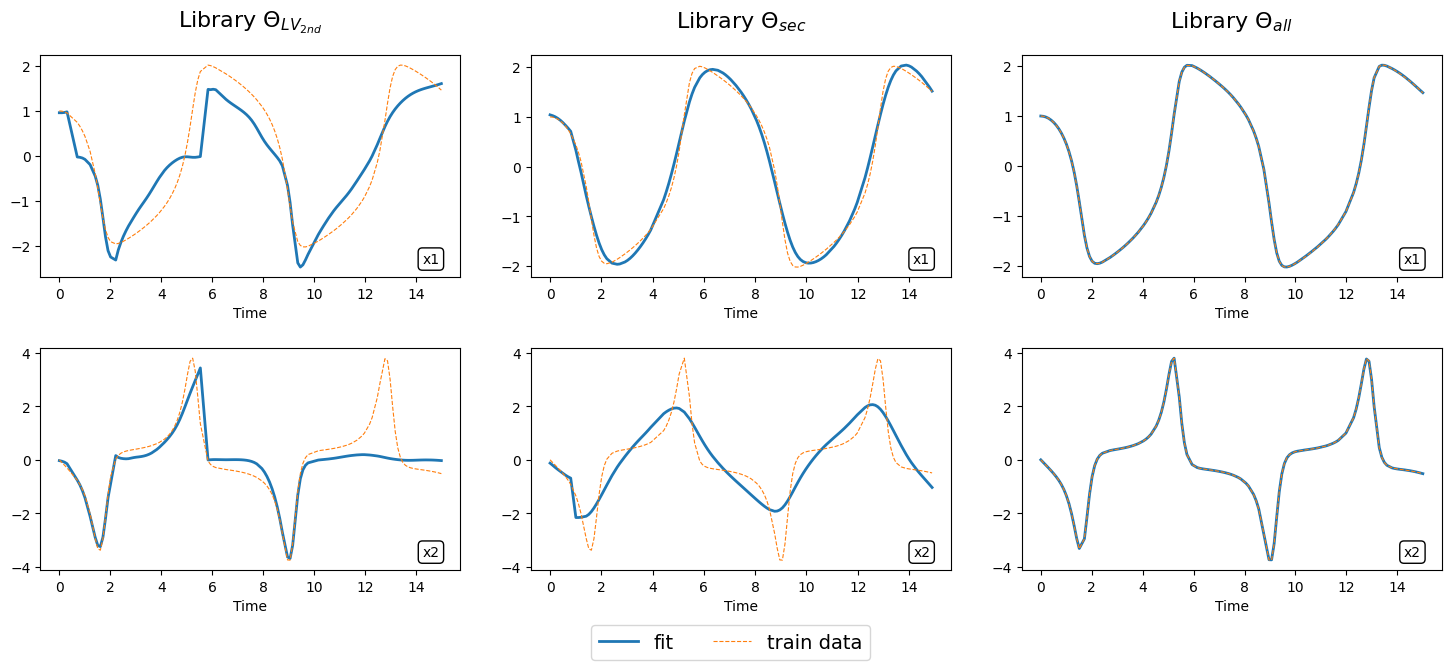

In [24]:
out_dir = output_dir_deepmod + "VanderPol/without_noise/"
n_taxa = 2

# three example runs
filenames = [
    "output_batch_10-07_VanderPol_run07_5_50_th0-01_int2",
    "output_batch_10-28_VanderPol_run01_5_50_th0-01_int5",
    "output_batch_10-07_VanderPol_run03_5_50_th0-01_int4"
    ]

fig, axs = plt.subplots(2, 3)

fig.set_figwidth(15)
fig.set_figheight(6)
fig.tight_layout(pad=2.0, h_pad=3)

# function to import the datafile and put it into the right format
for run_idx, run in enumerate(filenames):
    plot_path_tmp = f"{out_dir}{run}/Data/"
    if os.path.exists(f"{plot_path_tmp}/prediction_x1.csv"):
        for taxon in np.arange(1, n_taxa+1):
            # read data files
            df_pred = pd.read_csv(f"{plot_path_tmp}prediction_x{taxon}.csv", header=[0])
            df_data_train = pd.read_csv(f"{plot_path_tmp}data_train_x{taxon}.csv", header=[0])
            # convert files to numpy array
            data_train = np.array(df_data_train)
            pred = np.array(df_pred)
            # make plot
            axs[taxon-1, run_idx].plot(pred[:,1], pred[:,0], label = "fit", linewidth=2)
            axs[taxon-1, run_idx].plot(data_train[:,1], data_train[:,0], label = "train data", linewidth=0.8, linestyle = '--', color = colors[1])
            axs[taxon-1, run_idx].set_xlabel("Time")
            axs[taxon-1, run_idx].text(0.95, 0.05, f'x{taxon}', ha='right', va='bottom', transform=axs[taxon-1, run_idx].transAxes, bbox=dict(boxstyle="round", ec="black", fc="white"))

# set column titles
axs[0,0].set_title(r'Library $\Theta_{LV_{2nd}}$', fontsize = 16, pad = 20)
axs[0,1].set_title(r'Library $\Theta_{sec}$', fontsize = 16, pad = 20)
axs[0,2].set_title(r'Library $\Theta_{all}$', fontsize = 16, pad = 20)

# add one legend for all polts (in the lower center)
handles, labels = axs[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.08),
              fancybox=True, shadow=False, ncol = 4, fontsize = 14)

# save plots in one file
plt.savefig(f'{plot_dir}VdP_comparing_libraries_fits.pdf',
            bbox_inches='tight', dpi = 300)

## Boxplots DeepMoD VdP three libraries

C:\Users\Maria\AppData\Local\Temp\ipykernel_25524\1933078796.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


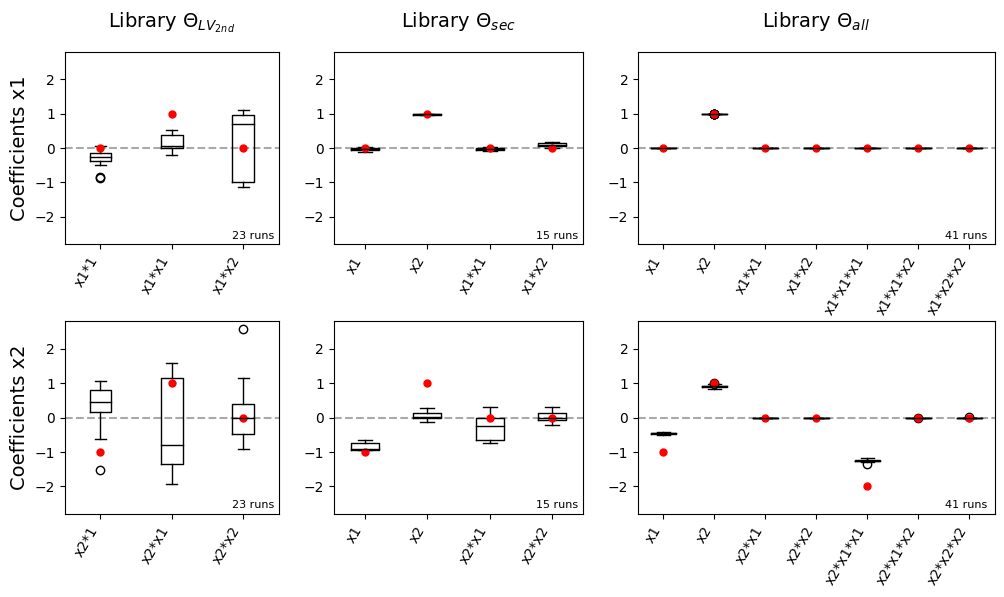

In [14]:
out_dir = output_dir_deepmod + "VanderPol/without_noise/"
n_taxa = 2

libraries = ["int2", "int5", "int4"]

# Function to create a boxplot for a given axis
def create_boxplot(ax, data, x_labels, title, true_coeffs = None, y_limits = None):
    boxplot = ax.boxplot(data)
    ax.set_title(title, fontsize = 12, pad = 16)
    ax.set_xticklabels(x_labels, rotation=60, ha="right")
    for median in boxplot['medians']:
        median.set_color('k')
    if true_coeffs is not None:
        ax.plot(range(1, len(true_coeffs)+1), true_coeffs, 'ro', markersize=5) # add true coeffs as red dots
    ax.axhline(y=0, color='#A9A9A9', linestyle='--', zorder=-3) # add horizontal line in 0
    if y_limits is not None:
        ax.set_ylim(y_limits)

# Function to generate boxplots for a specific library
def generate_boxplots(lib):
    runs = [s for s in os.listdir(out_dir) if lib in s and "." not in s and "th0-01" in s]

    if not runs:
        print(f"No runs found for {lib}.")
        return None

    list_coeffs_all = [pd.read_csv(f"{out_dir}{run}/Data/model_estimated_coeffs.csv", header=[0], index_col=[0]).to_numpy() for run in runs]
    df_library_tmp = pd.read_csv(f"{out_dir}{runs[-1]}/Data/model_library_values.csv", header=[0], index_col=[0])
    library_x1, library_x2 = df_library_tmp["x1"], df_library_tmp["x2"]

    coeffs_x1 = [[] for _ in range(list_coeffs_all[0].shape[0])]
    coeffs_x2 = [[] for _ in range(list_coeffs_all[0].shape[0])]
    for arr in list_coeffs_all:
        for i in range(arr.shape[0]):
            coeffs_x1[i].append(arr[i, 0])
            coeffs_x2[i].append(arr[i, 1])

    n_runs = len(coeffs_x1[0])

    return coeffs_x1, coeffs_x2, library_x1, library_x2, n_runs

# Adjusting the figure layout to add space for x3
width_ratios = [3, 3.5, 5]
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(2, len(libraries), width_ratios=width_ratios, wspace=0.2, hspace=0.4)
axs = np.array([[plt.subplot(gs[i, j]) for j in range(len(libraries))] for i in range(2)])

true_coeffs_x1 = [0, 1, 0, 0, 0, 0, 0]
true_coeffs_x2 = [-1, 1, 0, 0, -2, 0, 0] 

y_limits_row_1 = [-2.8, 2.8]
y_limits_row_2 = [-2.8, 2.8]

for i, lib in enumerate(libraries):
    result = generate_boxplots(lib)
    if result:
        coeffs_x1, coeffs_x2, library_x1, library_x2, n_runs = result
        create_boxplot(axs[0, i], coeffs_x1, library_x1, "", y_limits=y_limits_row_1, true_coeffs=true_coeffs_x1[0:len(coeffs_x1)])
        create_boxplot(axs[1, i], coeffs_x2, library_x2, "", y_limits=y_limits_row_2, true_coeffs=true_coeffs_x2[0:len(coeffs_x2)])
        axs[0, i].text(0.98, 0.02, f'{n_runs} runs', ha='right', va='bottom', fontsize = 8, transform=axs[0, i].transAxes)
        axs[1, i].text(0.98, 0.02, f'{n_runs} runs', ha='right', va='bottom', fontsize = 8, transform=axs[1, i].transAxes)

# set row names
axs[0, 0].set_ylabel("Coefficients x1", fontsize = 14)
axs[1, 0].set_ylabel("Coefficients x2", fontsize = 14)
# set column titles
axs[0, 0].set_title(r'Library $\Theta_{LV_{2nd}}$', fontsize = 14, pad = 18)
axs[0, 1].set_title(r'Library $\Theta_{sec}$', fontsize = 14, pad = 18)
axs[0, 2].set_title(r'Library $\Theta_{all}$', fontsize = 14, pad = 18)

plt.tight_layout()

# save plot
plt.savefig(f'{plot_dir}/VdP_DeepMoD_coeff_boxplots_red_dots.pdf', 
            bbox_inches='tight', dpi = 300)

## Plot fits DeepMoD VdP with noise

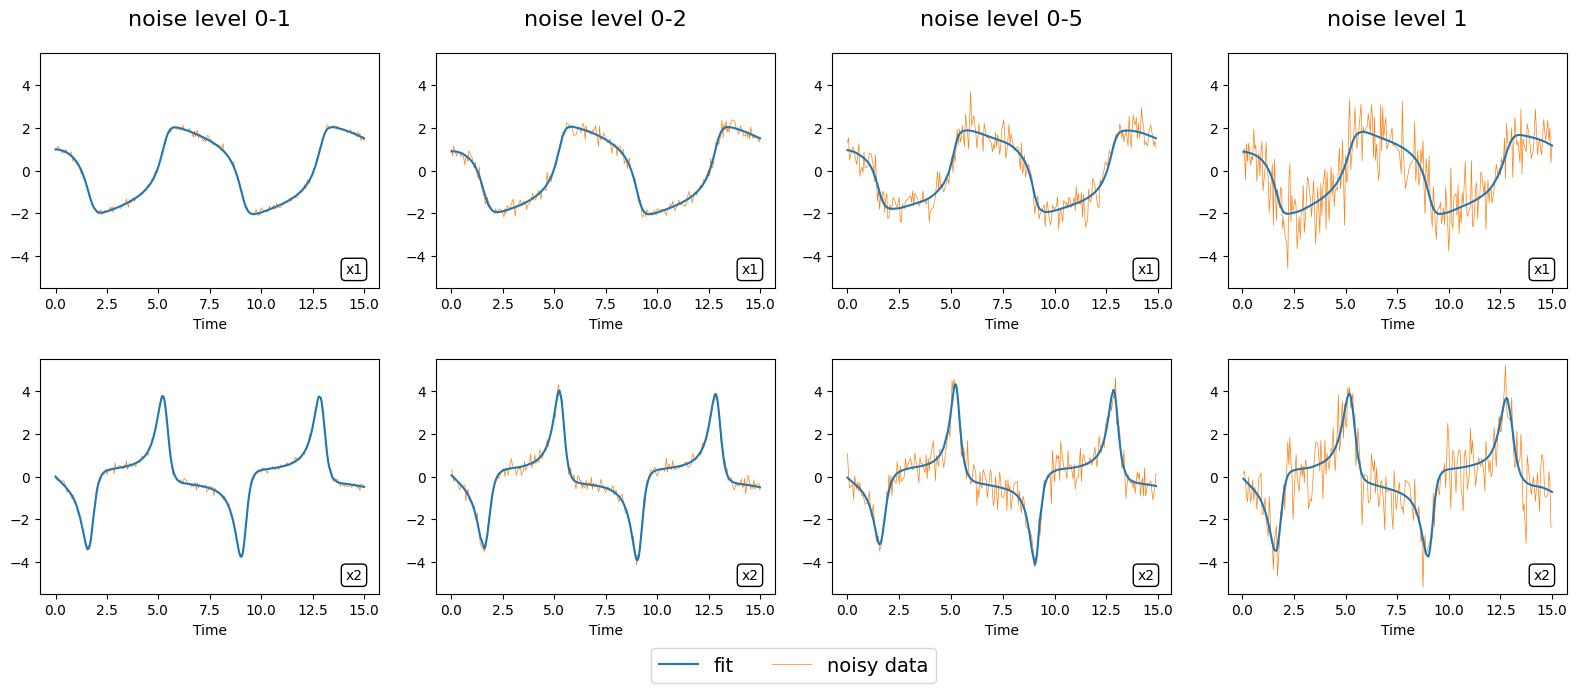

In [15]:
out_dir = output_dir_deepmod + "VanderPol/noise/"
batch = "batch_10-17_VanderPol"
n_taxa = 2

hl_number = 5
hl_size = 50 # 100
th = "th0-01"
int_order = 4

# specify plot dimensions
n_col = 4
n_row = n_taxa

fig, axs = plt.subplots(n_row, n_col)
fig.set_figwidth(4*n_col)
fig.set_figheight(3*n_row)
fig.tight_layout(w_pad=1.0, h_pad=3)

for i, noise in enumerate(["0-1", "0-2", "0-5", "1"]):

    spec = f'_{hl_number}_{hl_size}_{th}_int{int_order}'
    run = "02"
    plot_path_tmp = f"{out_dir}output_{batch}_run{run}_noise{noise}{spec}/Data/"

    if os.path.exists(f"{plot_path_tmp}prediction_x1.csv"):
        for taxon in np.arange(n_taxa):
            # read data files
            df_pred = pd.read_csv(f"{plot_path_tmp}prediction_x{taxon+1}.csv", header=[0])
            df_data_train = pd.read_csv(f"{plot_path_tmp}data_train_x{taxon+1}.csv", header=[0])
            # convert files to numpy array
            data_train = np.array(df_data_train)
            pred = np.array(df_pred)
            # make plot
            axs[taxon, i].plot(pred[:,1], pred[:,0], label = "fit")
            axs[taxon, i].plot(data_train[:,1], data_train[:,0], label = "noisy data", linewidth=0.5, color = colors[1], zorder = -1)
            axs[taxon, i].set_ylim([-5.5, 5.5])
            axs[taxon, i].set_xlabel("Time")
            axs[taxon, i].text(0.95, 0.05, f'x{taxon+1}', ha='right', va='bottom', transform=axs[taxon, i].transAxes, bbox=dict(boxstyle="round", ec="black", fc="white"))

        # set column titles
        axs[0, i].set_title(f"noise level {noise}", fontsize = 16, pad = 20)
    

# add one legend for all polts (in the lower center)
handles, labels = axs[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1),
            fancybox=True, shadow=False, ncol = 4, fontsize = 14)

# save plot
plt.savefig(f'{plot_dir}VdP_noise_fits_5_50.pdf', bbox_inches='tight', dpi = 300)

## Boxplots DeepMoD VdP with noise

In [16]:
# Function to create a boxplot for a given axis
def create_boxplot(ax, data, x_labels, title, true_coeffs, y_limits):
    boxplot = ax.boxplot(data)
    ax.set_title(title, fontsize = 18, pad = 20)
    ax.set_xticklabels(x_labels, rotation=60, ha="right")
    for median in boxplot['medians']:
        median.set_color('k')
    ax.plot(range(1, len(true_coeffs)+1), true_coeffs, 'ro', zorder=-2) # add true coeffs as red dots
    ax.axhline(y=0, color='#A9A9A9', linestyle='--', zorder=-3) # add horizontal line in 0
    ax.set_ylim(y_limits)

# Function to generate boxplots for a specific noise level
def generate_boxplots(noise):
    spec = f'noise{noise}'
    runs = [s for s in os.listdir(out_dir) if spec in s and "." not in s]

    if not runs:
        print(f"No runs found for {noise}.")
        return None

    list_coeffs_all = [pd.read_csv(f"{out_dir}{run}/Data/model_estimated_coeffs.csv", header=[0], index_col=[0]).to_numpy() for run in runs]
    df_library_tmp = pd.read_csv(f"{out_dir}{runs[-1]}/Data/model_library_values.csv", header=[0], index_col=[0])
    library_x1, library_x2 = df_library_tmp["x1"], df_library_tmp["x2"]

    coeffs_x1, coeffs_x2 = [[] for _ in range(list_coeffs_all[0].shape[0])], [[] for _ in range(list_coeffs_all[0].shape[0])]
    for arr in list_coeffs_all:
        for i in range(arr.shape[0]):
            coeffs_x1[i].append(arr[i, 0])
            coeffs_x2[i].append(arr[i, 1])

    n_runs = len(runs)

    return coeffs_x1, coeffs_x2, library_x1, library_x2, n_runs

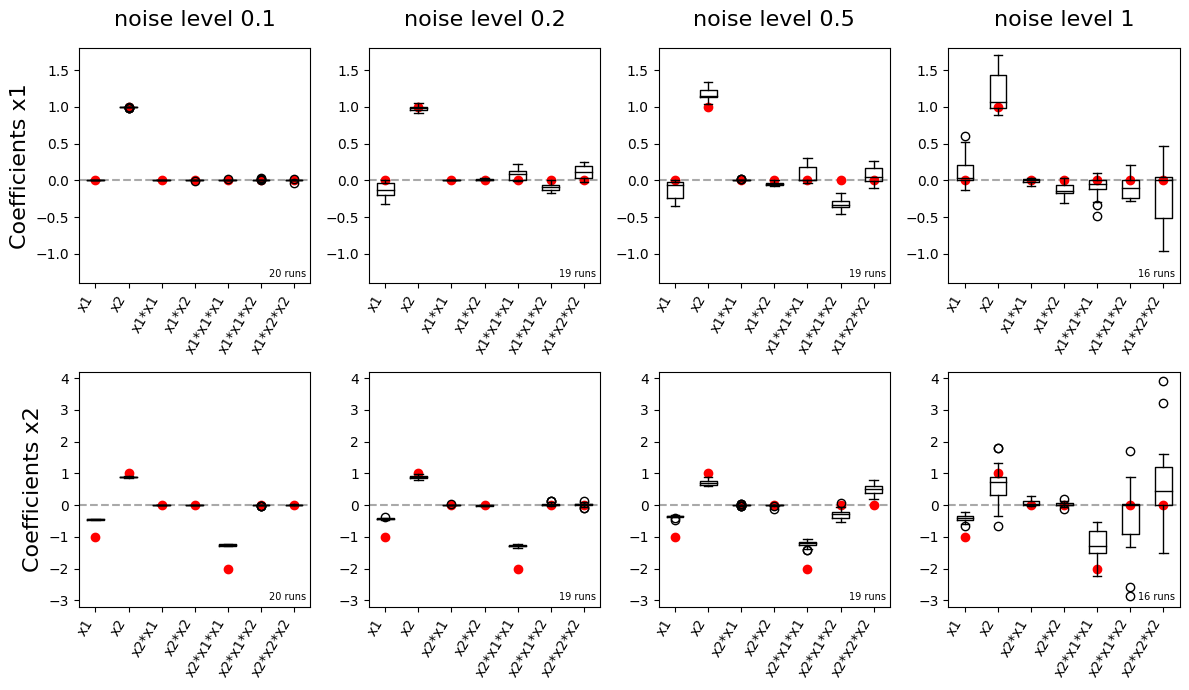

In [17]:
noises = ["0-1", "0-2", "0-5", "1"]
out_dir = output_dir_deepmod + "VanderPol/noise/"
n_taxa = 2

# Create the plots
fig, axs = plt.subplots(nrows=2, ncols=len(noises), figsize=(3 * len(noises), 7))

true_coeffs_x1 = [0, 1, 0, 0, 0, 0, 0]
true_coeffs_x2 = [-1, 1, 0, 0, -2, 0, 0]

y_limits_row_1 = [-1.4, 1.8]  
y_limits_row_2 = [-3.2, 4.2]  

for i, noise in enumerate(noises):
    result = generate_boxplots(noise)
    if result:
        coeffs_x1, coeffs_x2, library_x1, library_x2, n = result
        create_boxplot(axs[0, i], coeffs_x1, library_x1, "", true_coeffs_x1, y_limits_row_1)
        create_boxplot(axs[1, i], coeffs_x2, library_x2, "", true_coeffs_x2, y_limits_row_2)
        axs[0, i].text(0.98, 0.02, f'{n} runs', ha='right', va='bottom', fontsize = 7, transform=axs[0, i].transAxes)
        axs[1, i].text(0.98, 0.02, f'{n} runs', ha='right', va='bottom', fontsize = 7, transform=axs[1, i].transAxes)

# set row titles
axs[0, 0].set_ylabel("Coefficients x1", fontsize = 16)
axs[1, 0].set_ylabel("Coefficients x2", fontsize = 16)

# set column titles
axs[0, 0].set_title(f'noise level {noises[0].replace("-", ".")}', fontsize = 16, pad = 16)
axs[0, 1].set_title(f'noise level {noises[1].replace("-", ".")}', fontsize = 16, pad = 16)
axs[0, 2].set_title(f'noise level {noises[2].replace("-", ".")}', fontsize = 16, pad = 16)
axs[0, 3].set_title(f'noise level {noises[3].replace("-", ".")}', fontsize = 16, pad = 16)

plt.tight_layout()

plt.savefig(f'{plot_dir}/VdP_noise_DeepMoD_coeff_boxplots_red_dots.pdf', 
            bbox_inches='tight', dpi = 300)

## Heatmaps NODEBNGM miaSimS4 truth, raw, with noise

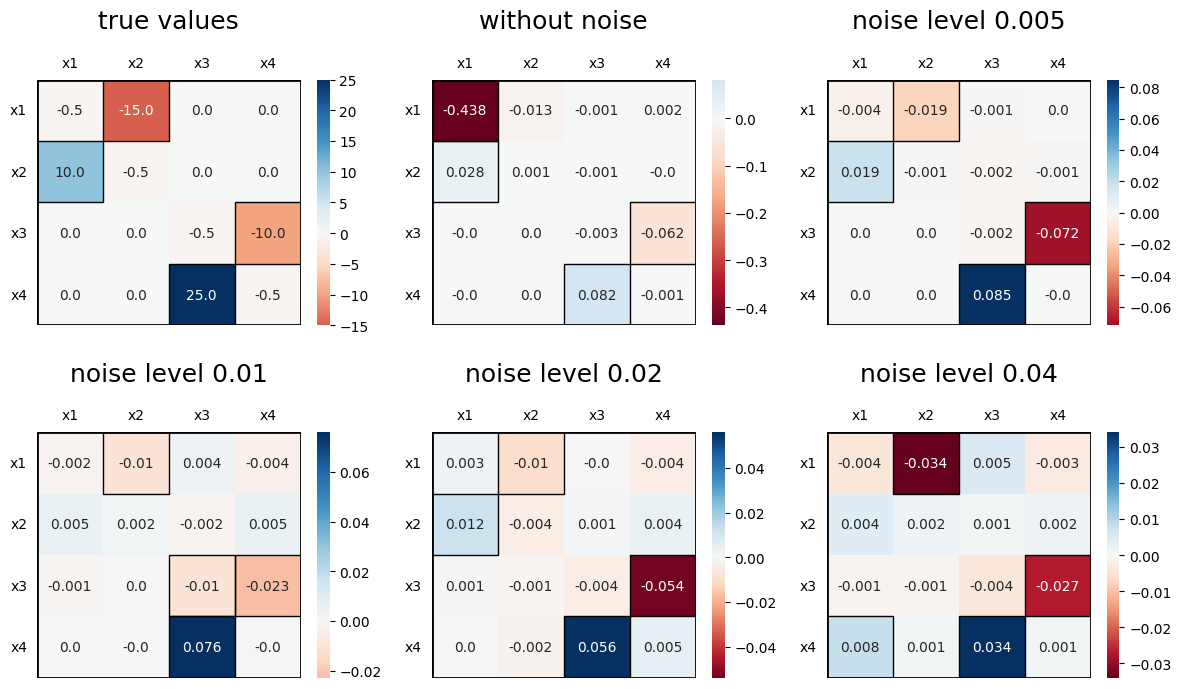

In [18]:
out_dir = output_dir_node

# ground truth model
weighted_effects_Mats = [
    np.array([[-0.5, -15, 0, 0], 
            [10, -0.5, 0, 0],
            [0, 0, -0.5, -10],
            [0, 0, 25, -0.5]])
    ]

Mat = "weighted_effectsMat_mean"

for noise in ["", "_noise_0-005", "_noise_0-01", "_noise_0-02", "_noise_0-04"]:
    out_run = out_dir + "/out_miaSim" + noise
    if os.path.exists(f"{out_run}/{Mat}.csv"):
        df_model_coeffs_tmp = pd.read_csv(f"{out_run}/{Mat}.csv", header=[0])
        weighted_effects_Mats.append(df_model_coeffs_tmp.to_numpy())

# build plot
fig, axs = plt.subplots(2, 3)

plot_heatmap(np.round(weighted_effects_Mats[0], 3), ax = axs[0,0], fig=fig, add_caption=False, add_outline=True)
plot_heatmap(np.round(weighted_effects_Mats[1], 3), ax = axs[0,1], fig=fig, add_caption=False, add_outline=True)
plot_heatmap(np.round(weighted_effects_Mats[2], 3), ax = axs[0,2], fig=fig, add_caption=False, add_outline=True)
plot_heatmap(np.round(weighted_effects_Mats[3], 3), ax = axs[1,0], fig=fig, add_caption=False, add_outline=True)
plot_heatmap(np.round(weighted_effects_Mats[4], 3), ax = axs[1,1], fig=fig, add_caption=False, add_outline=True)
plot_heatmap(np.round(weighted_effects_Mats[5], 3), ax = axs[1,2], fig=fig, add_caption=False, add_outline=True)

axs[0, 0].set_title("true values", fontsize = 18, pad = 20)
axs[0, 1].set_title("without noise", fontsize = 18, pad = 20)
axs[0, 2].set_title("noise level 0.005", fontsize = 18, pad = 20)
axs[1, 0].set_title("noise level 0.01", fontsize = 18, pad = 20)
axs[1, 1].set_title("noise level 0.02", fontsize = 18, pad = 20)
axs[1, 2].set_title("noise level 0.04", fontsize = 18, pad = 20)
    
fig.set_figwidth(12)
fig.set_figheight(7)
fig.tight_layout(h_pad=2)

# save plot
plt.savefig(f'{plot_dir}NODEBNGM_miaSim_noise_{Mat}_heatmap_3.pdf',
            bbox_inches='tight', dpi = 300)

## Heatmaps miaSimS4 all three methods

In [19]:
# general inputs
n_taxa = 4

### original model

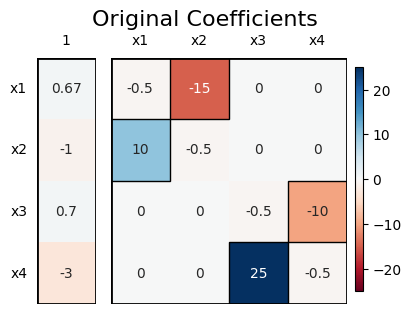

In [20]:
# load data
g_org = np.array([2/3, -1, 0.7, -3])
A_org = np.array([[-0.5, -15, 0, 0], 
                  [10, -0.5, 0, 0],
                  [0, 0, -0.5, -10],
                  [0, 0, 25, -0.5]])

# make heatmap
plot_heatmaps(A_org, g_org, n_taxa, title="Original Coefficients")

# save plot
plt.savefig(f'{plot_dir}coeff_heatmaps_miaSim_org.png',
             dpi = 300, bbox_inches='tight')

### gLV

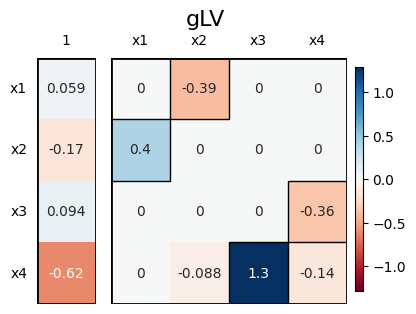

In [21]:
out_dir = output_dir_glv + "output_miaSim/output_miaSim_run_03/"

# load data
A_glv = pd.read_csv(f"{out_dir}glv_miaSim_elastic_net_A.csv", index_col = 0).to_numpy()
g_glv = pd.read_csv(f"{out_dir}glv_miaSim_elastic_net_g.csv", index_col = 0).to_numpy()

# make heatmap
plot_heatmaps(A_glv, g_glv, n_taxa, title = "gLV")

# save plot
plt.savefig(f'{plot_dir}coeff_heatmaps_miaSim_gLV.png',
             dpi = 300, bbox_inches='tight')

### DeepMoD

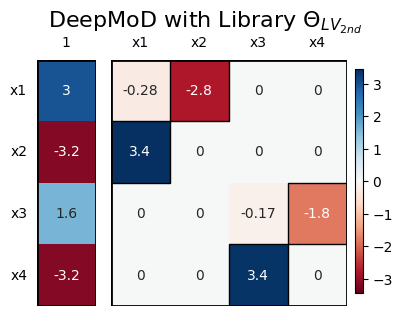

In [22]:
deepmod_out = output_dir_deepmod + "miaSimS4/_int_2/output_batch_10-23_miaSimS4_new_run001_10_50_th0-1_int2/"

# load data
coeffs_deepmod = pd.read_csv(f"{deepmod_out}Data/model_estimated_coeffs.csv", header=0, index_col=0)

g_deepmod = coeffs_deepmod.transpose()["x1*1"].values.reshape((n_taxa, 1))
A_deepmod = coeffs_deepmod.transpose().iloc[:, 1:5].to_numpy()

# make heatmap
plot_heatmaps(A_deepmod, g_deepmod, n_taxa, title=r"DeepMoD with Library $\Theta_{LV_{2nd}}$")

# save plot
plt.savefig(f'{plot_dir}coeff_heatmaps_miaSim_deepmod_th-0-1.png',
             dpi = 300, bbox_inches='tight')

### NODEBNGM

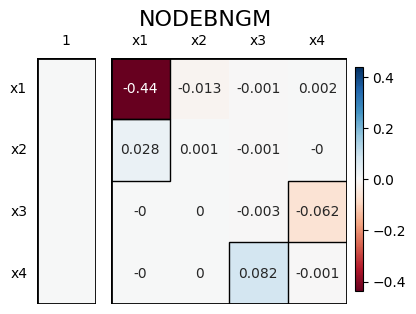

In [23]:
# load data
coeffs_node = pd.read_csv(f"{output_dir_node}out_miaSim/weighted_effectsMat_mean.csv", header=0)

A_node = coeffs_node.to_numpy()
# make heatmap
plot_heatmaps(A_node, g = None, n_taxa=n_taxa, title="NODEBNGM")

# save plot
plt.savefig(f'{plot_dir}coeff_heatmaps_miaSim_NODEBNGM.png',
             dpi = 300, bbox_inches='tight')